In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [5]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,False,False,False,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False,False,False,False
378,False,False,False,False,False,False,False,False,False,False,False,False,False
379,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

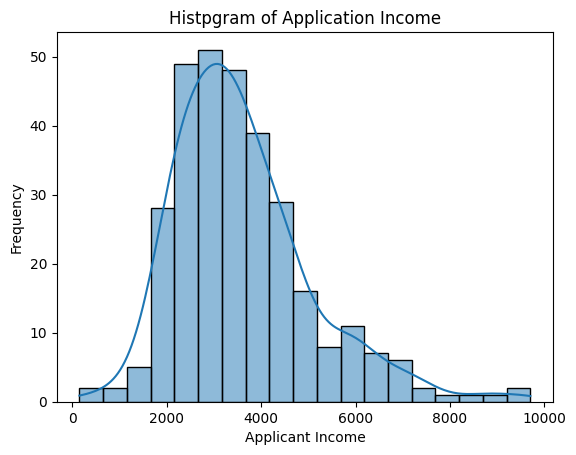

In [11]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Histpgram of Application Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

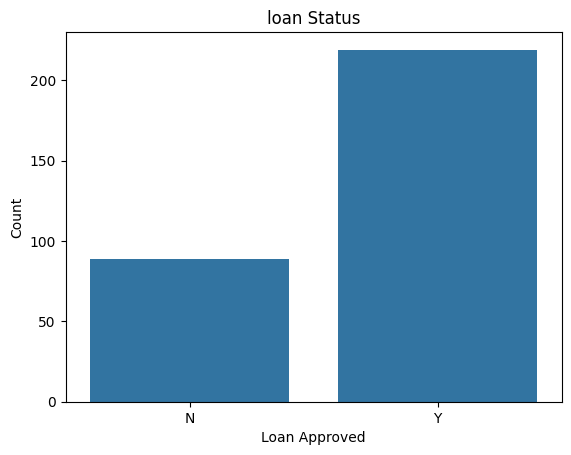

In [12]:
sns.countplot(x = "Loan_Status", data = df)
plt.title("loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [13]:
df.groupby("Education")["LoanAmount"].mean().reset_index()

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


In [14]:
avg_loan_amount_by_education = df.groupby("Education")["LoanAmount"].mean().reset_index()

In [15]:
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


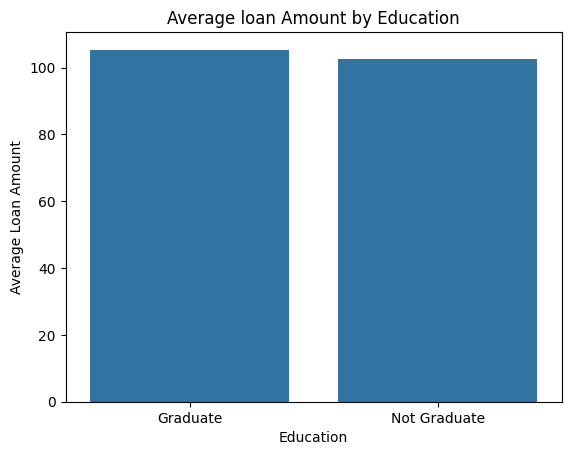

In [16]:
sns.barplot(x="Education" , y = "LoanAmount", data = avg_loan_amount_by_education)
plt.title("Average loan Amount by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

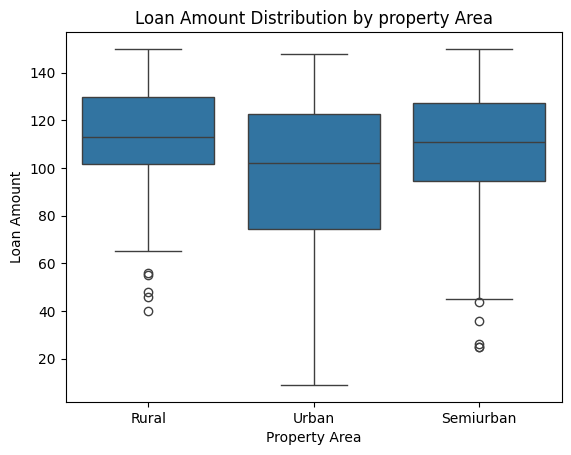

In [17]:
sns.boxplot(x="Property_Area" , y="LoanAmount",data = df)
plt.title("Loan Amount Distribution by property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

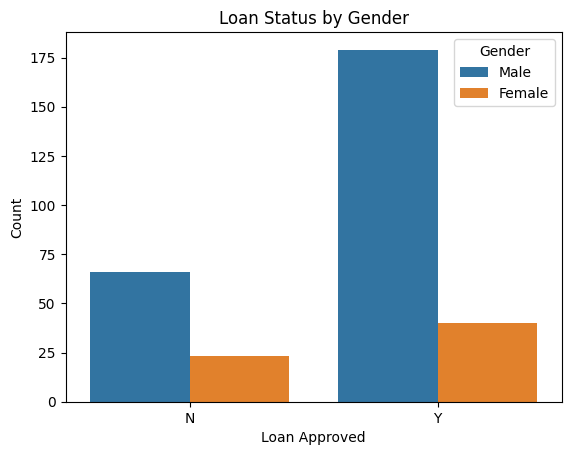

In [18]:
sns.countplot(x ="Loan_Status", hue="Gender" , data = df)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

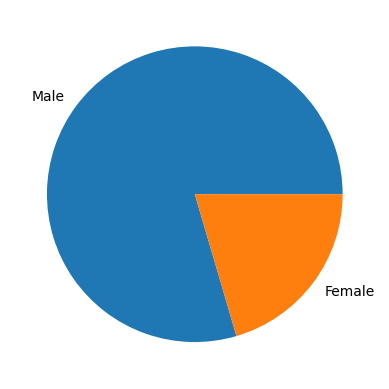

In [19]:
df["Gender"].value_counts().plot(kind= "pie")
plt.ylabel("")
plt.show()

In [20]:
Loan_Status_by_married = df.groupby("Married")["Loan_Status"].value_counts().unstack()

In [21]:
import matplotlib.pyplot as plt


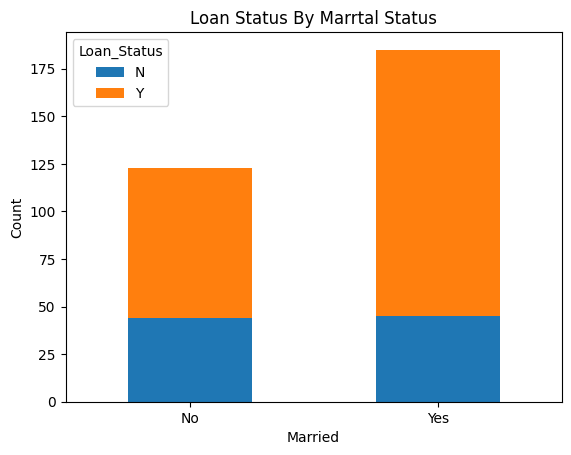

In [22]:
Loan_Status_by_married.plot(kind="bar", stacked = True)
plt.title("Loan Status By Marrtal Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan_Status")
plt.xticks(rotation=0)
# plt.grid()
plt.show()

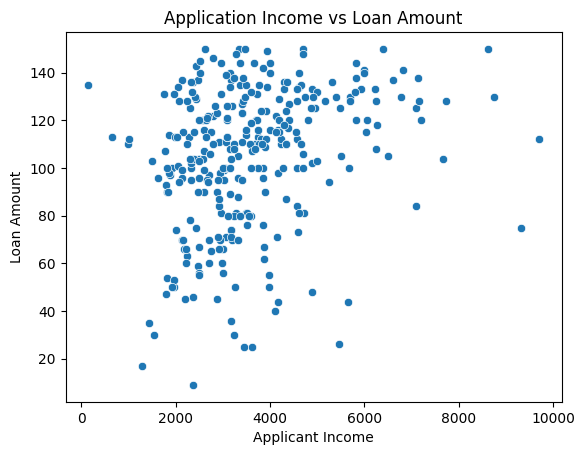

In [23]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data = df)
plt.title("Application Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [24]:
Numeric_df = df.select_dtypes(include=["int64","float64"])

In [25]:
Numeric_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128,360.0,1.0
1,3000,0.0,66,360.0,1.0
2,2583,2358.0,120,360.0,1.0
3,6000,0.0,141,360.0,1.0
4,2333,1516.0,95,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128,360.0,1.0
377,3232,1950.0,108,360.0,1.0
378,2900,0.0,71,360.0,1.0
379,4106,0.0,40,180.0,1.0


In [26]:
correlation_matrix = Numeric_df.corr()

In [27]:
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


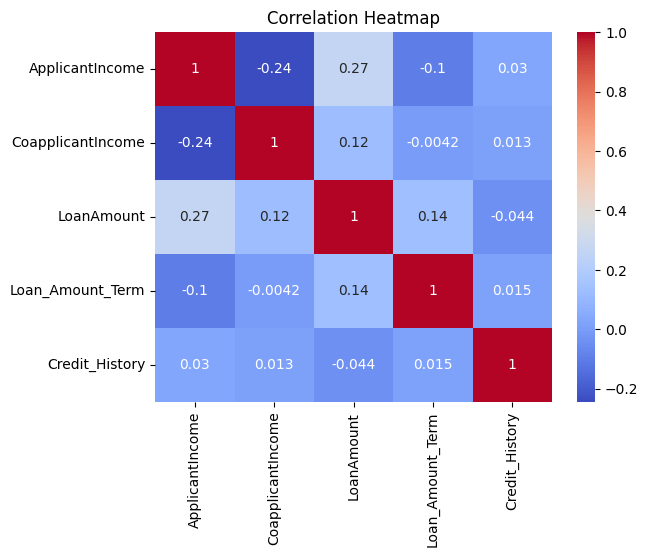

In [28]:
sns.heatmap(correlation_matrix , annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
avg_loan_term_by_employed = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()

In [30]:
avg_loan_term_by_employed 

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


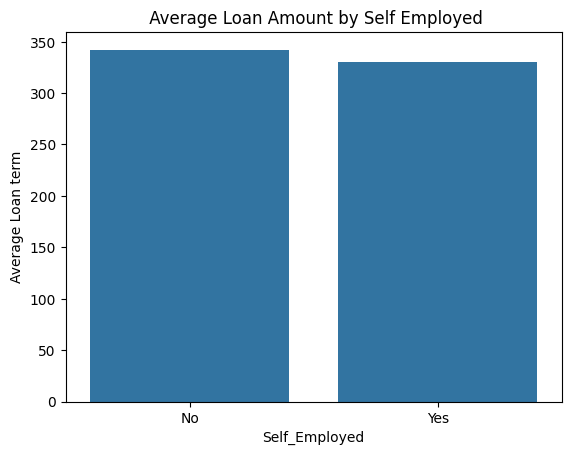

In [31]:
sns.barplot(x="Self_Employed", y="Loan_Amount_Term" , data = avg_loan_term_by_employed)
plt.title(" Average Loan Amount by Self Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Average Loan term")
plt.show()

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


In [33]:
X = df[["Married","ApplicantIncome","Education","LoanAmount","Credit_History"]]

In [34]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128,1.0
1,Yes,3000,Graduate,66,1.0
2,Yes,2583,Not Graduate,120,1.0
3,No,6000,Graduate,141,1.0
4,Yes,2333,Not Graduate,95,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128,1.0
377,Yes,3232,Graduate,108,1.0
378,No,2900,Graduate,71,1.0
379,Yes,4106,Graduate,40,1.0


In [35]:
Y = df[["Loan_Status"]]

In [36]:
Y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [37]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [38]:
# y["Loan_Status"] = labelencoder.fit_transoform(y["Loan_Status"])
labelencoder = preprocessing.LabelEncoder()
Y["Loan_Status"] = labelencoder.fit_transform(Y["Loan_Status"])

C:\Users\hp\AppData\Local\Temp\ipykernel_4708\3742682171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Loan_Status"] = labelencoder.fit_transform(Y["Loan_Status"])


In [39]:
Y #y is 1 n is 0

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [40]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [41]:
type(X["Credit_History"][0])

numpy.float64

In [42]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128,1.0
1,Yes,3000,Graduate,66,1.0
2,Yes,2583,Not Graduate,120,1.0
3,No,6000,Graduate,141,1.0
4,Yes,2333,Not Graduate,95,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128,1.0
377,Yes,3232,Graduate,108,1.0
378,No,2900,Graduate,71,1.0
379,Yes,4106,Graduate,40,1.0


In [43]:
X["Married"] = labelencoder.fit_transform(X["Married"])

C:\Users\hp\AppData\Local\Temp\ipykernel_4708\221913637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"] = labelencoder.fit_transform(X["Married"])


In [44]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,Graduate,128,1.0
1,1,3000,Graduate,66,1.0
2,1,2583,Not Graduate,120,1.0
3,0,6000,Graduate,141,1.0
4,1,2333,Not Graduate,95,1.0
...,...,...,...,...,...
376,1,5703,Graduate,128,1.0
377,1,3232,Graduate,108,1.0
378,0,2900,Graduate,71,1.0
379,1,4106,Graduate,40,1.0


In [45]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [46]:
X["Education"] = labelencoder.fit_transform(X["Education"])

C:\Users\hp\AppData\Local\Temp\ipykernel_4708\2197850253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = labelencoder.fit_transform(X["Education"])


In [47]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128,1.0
1,1,3000,0,66,1.0
2,1,2583,1,120,1.0
3,0,6000,0,141,1.0
4,1,2333,1,95,1.0
...,...,...,...,...,...
376,1,5703,0,128,1.0
377,1,3232,0,108,1.0
378,0,2900,0,71,1.0
379,1,4106,0,40,1.0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X = scaler.fit_transform(X)

In [50]:
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]],
      shape=(308, 5))

In [51]:
import joblib
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y , test_size=0.4)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test,predictions)))

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train , y_train)

c:\Users\hp\Desktop\Loan_Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
log_predictions = log_model.predict(X_test)

In [58]:
modelperformance(log_predictions)

Accuracy score in model is 0.8790322580645161


In [59]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors" : [3,5,7,8,6],
              "weights": ["uniform", "distance"]}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(X_train, y_train.values.ravel())

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [60]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [61]:
knpreds = gridkn.predict(X_test)

In [62]:
modelperformance(knpreds)

Accuracy score in model is 0.8467741935483871


In [63]:
from sklearn.svm import SVC

In [64]:
svm = SVC()
param_grid_svc = {"C":[0.04,0.01,0.02,0.1,0.5],"kernel":["linear","rbf","poly"]}

In [65]:
gridsvc = GridSearchCV(svm,param_grid_svc)

In [66]:
gridsvc.fit(X_train, y_train.values.ravel())

,estimator,SVC()
,param_grid,"{'C': [0.04, 0.01, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.04


In [67]:
gridsvc.best_params_

{'C': 0.04, 'kernel': 'linear'}

In [68]:
pred_svc = gridsvc.predict(X_test)
modelperformance(pred_svc)

Accuracy score in model is 0.8870967741935484


In [69]:
joblib.dump(gridsvc, "model.pkl")

['model.pkl']

In [70]:
X
# 0 3500 1 100 1

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]],
      shape=(308, 5))

In [71]:
import joblib
testmodel = joblib.load("model.pkl")

In [72]:
# 0 3500 1 100 1

In [73]:
testmodel.predict([[0,3500,1,100,1]])[0]

np.int64(1)